# Group125_KyphosisDataset - ML Assignment
### Team Members:
    1. Nareshkumar Perumalsamy (2020FC04122)
    2. Kommajyosula VNS Kanth (2020FC04120)
    3. Chama Pavan Kumar (2020FC04410)


## Import Libraries and Dataset

In [1]:
#Importing Libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler

In [2]:
#Loading dataset into dataframe variable 'data'
data = pd.read_csv('kyphosis.csv')

## Data Visualization and Exploration

In [3]:
#checking the record count and feature details of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
#displaying first five records of the given dataset
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
#describing the dataset to understand the data
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
#Checking the total no. of rows and columns present in the given dataset
data.shape

(81, 4)

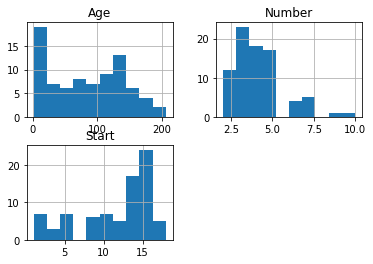

In [7]:
#Understanding the dataset using histogram graph
data.hist()
plt.show()

From the above histogram graph: Age, Number and Start values are distributed in the dataset.
Kyphosis is the class variable hence we can use it for prediction.
Kyphosis feature is not having balanced data. So we need to do oversampling the data for prediction.

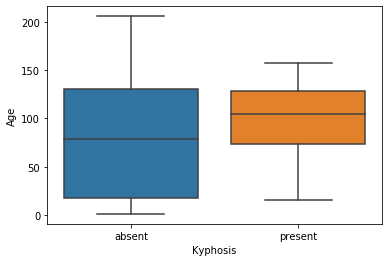

In [8]:
sns.boxplot(x="Kyphosis", y="Age", data=data)

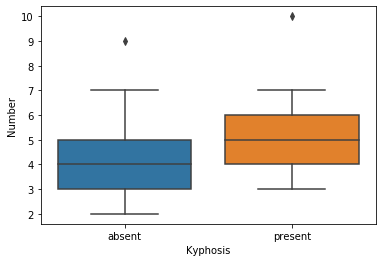

In [9]:
sns.boxplot(x="Kyphosis", y="Number", data=data)

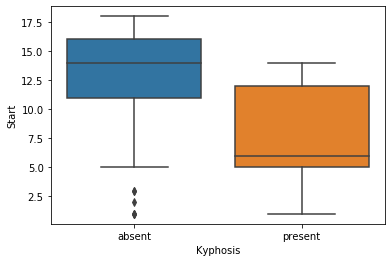

In [10]:
sns.boxplot(x="Kyphosis", y="Start", data=data)

There are outliers present in the Start and Number features but we cant remove those data since the age feature has no outliers.
Removing the outliers in those features may remove the valid age data in the dataset. so we are not deleting the outlers data.

## Data Pre-Processing and cleaning

In [11]:
#Checking null value exists in the dataset
data.isnull().sum().sum()

0

No null values exists in the dataset.

In [12]:
#The class feature 'Kyphosis' has only absent or present value. Converting absent value to 0 and present value to 1 
#using panda's factorize function.
data['Kyphosis'] = pd.factorize(data.Kyphosis)[0]

In [13]:
#Kyphosis values are changed to 0's and 1's
data.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [14]:
data.describe()

,Kyphosis,Age,Number,Start
count,81.000000,81.000000,81.000000,81.000000
mean,0.209877,83.654321,4.049383,11.493827
std,0.409758,58.104251,1.619423,4.883962
min,0.000000,1.000000,2.000000,1.000000
25%,0.000000,26.000000,3.000000,9.000000
50%,0.000000,87.000000,4.000000,13.000000
75%,0.000000,130.000000,5.000000,16.000000
max,1.000000,206.000000,10.000000,18.000000


In [15]:
#Checking mean value of all the feaurtures for the class values.
data.groupby('Kyphosis').mean()

,Age,Number,Start
Kyphosis,,,
0,79.890625,3.750000,12.609375
1,97.823529,5.176471,7.294118


In [16]:
#Checking the no.of records present for the 0's and 1's value
data.groupby('Kyphosis').count()

,Age,Number,Start
Kyphosis,,,
0,64,64,64
1,17,17,17


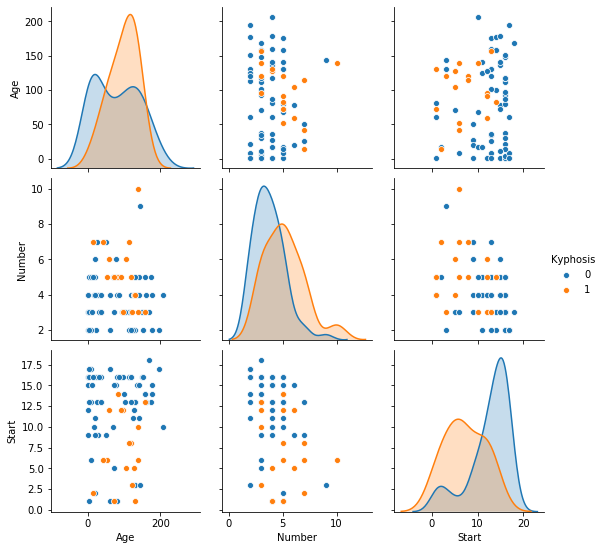

In [17]:
#To see the distributions and correlations of the features
sns.pairplot(data,hue='Kyphosis')

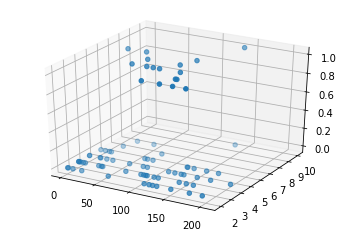

In [18]:

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(data['Age'], data['Number'],data['Kyphosis'])


plt.show()


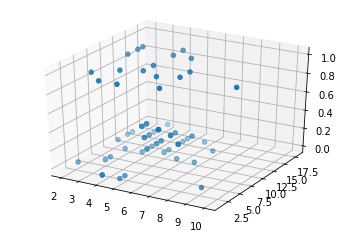

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data['Number'], data['Start'],data['Kyphosis'])
plt.show()

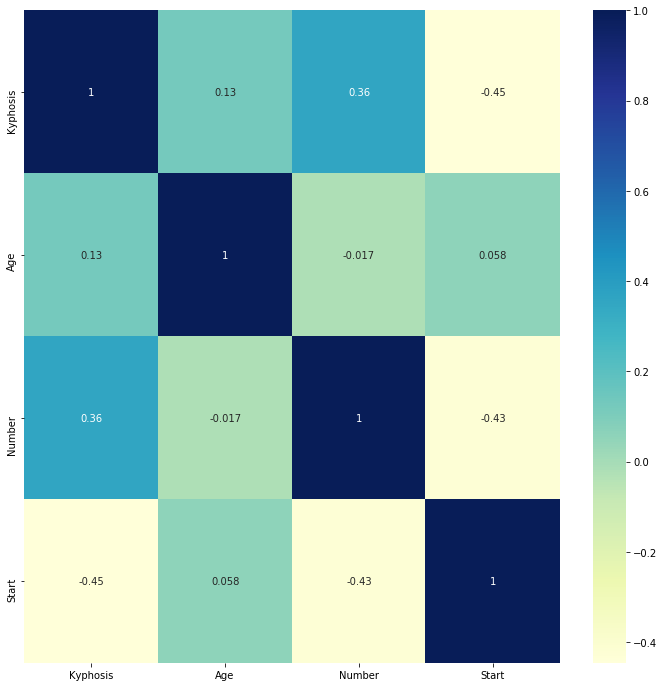

In [20]:
#To compare the features 
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [21]:
#Using ANOVA correlation coefficient for feature selection
mod = ols('Kyphosis ~ Age+Number+Start', data=data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df          F    PR(>F)
Age       0.305696   1.0   2.360047  0.128578
Number    0.474736   1.0   3.665077  0.059279
Start     1.472622   1.0  11.369003  0.001171
Residual  9.973779  77.0        NaN       NaN


In [22]:
mod = ols('Age ~ Number', data=data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq    df         F    PR(>F)
Number        75.212185   1.0  0.022005  0.882451
Residual  270013.108803  79.0       NaN       NaN


In [23]:
mod = ols('Age ~ Start', data=data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq    df         F    PR(>F)
Start        903.192947   1.0  0.265068  0.608097
Residual  269185.128041  79.0       NaN       NaN


In [24]:
mod = ols('Start ~ Number', data=data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq    df         F    PR(>F)
Number     344.837298   1.0  17.42483  0.000076
Residual  1563.409615  79.0       NaN       NaN


In [25]:
mod = ols('Kyphosis ~ Age', data=data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

             sum_sq    df        F    PR(>F)
Age        0.214824   1.0  1.28401  0.260582
Residual  13.217275  79.0      NaN       NaN


After verified the plots and Anova model, we can understand 'Kyphosis', 'Start' and 'Number' features not highly correlated to each other.
So we are considering all the features to train the model.

## Data Preparation

In [26]:
#Spliting the 70% data for training the model and 30% data for testing the model


X=data.drop('Kyphosis', axis=1)
y=data['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [27]:
#Checking the trainig data count and testing data count
print(X_train.count())
print(y_test.count())

#Checking the count of 0s and 1s in both training and test variable
print('y_test: 0',(y_test== 0).sum(axis=0))
print('y_test: 1',(y_test== 1).sum(axis=0))
print('y_train: 0',(y_train== 0).sum(axis=0))
print('y_train: 1',(y_train== 1).sum(axis=0))


Age       56
Number    56
Start     56
dtype: int64
25
y_test: 0 18
y_test: 1 7
y_train: 0 46
y_train: 1 10


From the above results, the record count of class value '1' is very less when compared to the record count of class value '0'. The dataset is imbalanced.
To increase record count of class value '1' in training variable, we are going to use oversampling method. 

In [28]:
# Using the oversampling method, balancing the dataset. 

oversample = RandomOverSampler(sampling_strategy=0.5)

In [29]:
os_data_X, os_data_y = oversample.fit_resample(X_train, y_train)

In [30]:
X_train=os_data_X
y_train=os_data_y

#Verifying the record count of balanced dataset
print(X_train.count())
print(y_train.count())

print('y_train: 0',(y_train== 0).sum(axis=0))
print('y_train: 1',(y_train== 1).sum(axis=0))

Age       69
Number    69
Start     69
dtype: int64
69
y_train: 0 46
y_train: 1 23


From the above results, we can see additional 10 records added for the class value '1' in y_train variable.

## Model Building - Decision Tree

In [31]:
#Using decision tree classifier for the prediction
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Decision Tree - Performance Evaluation

In [32]:
predictions=dtree.predict(X_test)
#printing confusion matrix
print(confusion_matrix(y_test,predictions))


[[16  2]
 [ 3  4]]


In [33]:
#printing classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.67      0.57      0.62         7

    accuracy                           0.80        25
   macro avg       0.75      0.73      0.74        25
weighted avg       0.79      0.80      0.80        25



In [34]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8


## Model Building - Random Forest

In [35]:
#Using Random Forest classifier for the prediction
rfc= RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

## Random Forest - Performance Evaluation

In [36]:
rfc_predictions=rfc.predict(X_test)
#printing confusion matrix
print(confusion_matrix(y_test,rfc_predictions))


[[16  2]
 [ 4  3]]


In [37]:
#printing classification report
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.60      0.43      0.50         7

    accuracy                           0.76        25
   macro avg       0.70      0.66      0.67        25
weighted avg       0.74      0.76      0.75        25



In [38]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predictions))

Accuracy: 0.76


## Model Building - Logistic Regression

In [39]:
#Using Logistic Regression classifier for the prediction
logR = LogisticRegression(solver='liblinear', random_state=0)
logR.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

## Logistic Regression - Performance Evaluation

In [40]:
logR_predictions=logR.predict(X_test)
#printing confusion matrix
print(confusion_matrix(y_test,logR_predictions))

[[16  2]
 [ 2  5]]


In [41]:
#printing classification report
print(classification_report(y_test, logR_predictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.71      0.71      0.71         7

    accuracy                           0.84        25
   macro avg       0.80      0.80      0.80        25
weighted avg       0.84      0.84      0.84        25



In [42]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, logR_predictions))

Accuracy: 0.84


## Prediction Results and Conclusion
Decision Tree : 80% Accuracy,
Random Forest : 76% Accuracy,
Logistic Regression : 84% Accuracy
    
All the three models peforms almost same percent of accuracy. We can say all these classification models can predict better accurate results for this dataset.

Insights:
The patient whose age is lesser than 75 and the number of levels involved is greater than 5 likely to have risk factors for kyphosis following surgery.

The given features are not dependent hence any result can happen. Due to less volume of data in the dataset, we cant predict accurate results.

